<h1><center><h><center><font color='Red'> CNN RNN   <font color='Blue'> Gesture Recognition <font color='Green'> Assignement :

<h5><center> By <br><br>
Sandip Shinde / Farooq Ahmed  <br>
email <font color='Blue'>shinde.sandip.s@gmail.com / farooqams@hotmail.com<font color='Blue'> <br>
<h4><center> Feb 2022<br><br>

#### Objective of the Assignement 

###### The assignement required to model CNN/RNN  which can accurately detect recognise five different gestures. using data from 
###### https://drive.google.com/uc?id=1ehyrYBQ5rbQQe6yL4XbLWe3FMvuVUGiL


###### We will approach the problem by  assessing the significant drivers /layers and identifying the problem by Pythonic way, reducing duplcating task where possible / applicable. In addtion, using in Google Colab Pro GPU. 

# Reset Colab Drive - Optional 

In [1]:
from google.colab import drive
drive.flush_and_unmount()
print("Data Delated")


Drive not mounted, so nothing to flush and unmount.
Data Delated


In [2]:
!rm -rf /content/Demo_Gesture
!rm -rf /content/model_init*




# Version Control

In [3]:
%tensorflow_version 2 # 1.5.0
## we use version 2 since it compitable with TDQM 

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2 # 1.5.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [4]:
import tensorflow
print(tensorflow.__version__)

2.8.0


# BenchMarking System Resources

In [5]:
import psutil
cpu = psutil.cpu_count(logical=True)
print('Your runtime has {:.0f} available CPUs\n'.format(cpu))
psutil.disk_usage('/content')

Your runtime has 4 available CPUs



sdiskusage(total=179134558208, used=45389271040, free=133728509952, percent=25.3)

In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)


Sun Feb 27 16:36:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [8]:
%%time
import warnings
warnings.filterwarnings('ignore')

CPU times: user 15 µs, sys: 4 µs, total: 19 µs
Wall time: 21.9 µs


# Install Library [Not Available in Colab]

In [9]:
!pip install -U tensorflow-addons scipy==1.1.0 -q 

# Import Library

In [10]:
import datetime 
import numpy as np 
import pandas as pd

In [11]:
import seaborn as sns ## download for using rich sea-born theme 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [12]:
import tqdm

In [13]:
from scipy.misc import imread, imresize

In [14]:
import pathlib

In [15]:
import numpy as np
import os
from scipy.misc import imread, imresize
import datetime
import os

In [16]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
#tf.set_random_seed(30)

import tensorflow_addons as tfa

In [17]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
import keras



In [18]:
# check version
print(tf.__version__)

2.8.0


In [19]:
%%time
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

CPU times: user 27.4 ms, sys: 4.35 ms, total: 31.7 ms
Wall time: 46.7 ms


*Authenticate* and create the PyDrive client.

In [20]:
%%time
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

CPU times: user 175 ms, sys: 36.7 ms, total: 212 ms
Wall time: 34.1 s


# Download  and Cleaning Data


In [21]:
%%time
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive
CPU times: user 938 ms, sys: 211 ms, total: 1.15 s
Wall time: 18.5 s


In [22]:
!ls #'/content/gdrive'

adc.json  gdrive  sample_data


In [23]:
if os.path.isdir('/content/Demo_Gesture')==True:
  print('Path Exist')
if os.path.isdir('/content/Demo_Gesture')==False:
  os.mkdir('/content/Demo_Gesture')

 We copy data in Colab for faster execution

In [24]:
!cp -av '/content/gdrive/MyDrive/Demo_Gesture' '/content'

'/content/gdrive/MyDrive/Demo_Gesture/Project_data.zip' -> '/content/Demo_Gesture/Project_data.zip'


In [25]:
!unzip "/content/Demo_Gesture/Project_data.zip" -d "/content/Demo_Gesture/"

Streaming output truncated to the last 5000 lines.
 extracting: /content/Demo_Gesture/Project_data/train/WIN_20180926_17_34_37_Pro_Stop_new/WIN_20180926_17_34_37_Pro_00050.png  
 extracting: /content/Demo_Gesture/Project_data/train/WIN_20180926_17_34_37_Pro_Stop_new/WIN_20180926_17_34_37_Pro_00052.png  
 extracting: /content/Demo_Gesture/Project_data/train/WIN_20180926_17_34_37_Pro_Stop_new/WIN_20180926_17_34_37_Pro_00054.png  
 extracting: /content/Demo_Gesture/Project_data/train/WIN_20180926_17_34_37_Pro_Stop_new/WIN_20180926_17_34_37_Pro_00056.png  
 extracting: /content/Demo_Gesture/Project_data/train/WIN_20180926_17_34_37_Pro_Stop_new/WIN_20180926_17_34_37_Pro_00058.png  
 extracting: /content/Demo_Gesture/Project_data/train/WIN_20180926_17_34_37_Pro_Stop_new/WIN_20180926_17_34_37_Pro_00060.png  
 extracting: /content/Demo_Gesture/Project_data/train/WIN_20180926_17_34_37_Pro_Stop_new/WIN_20180926_17_34_37_Pro_00062.png  
   creating: /content/Demo_Gesture/Project_data/train/WIN_20

In [26]:
root_path = '/content/Demo_Gesture/Project_data' # use CoLab Drive for faster processing 
data_train = pathlib.Path(root_path + '/train')
data_val = pathlib.Path(root_path + '/val')

In [27]:
image_count_train = len(list(data_train.glob('*/*.png')))
print(image_count_train)
image_count_val = len(list(data_val.glob('*/*.png')))
print(image_count_val)

19890
3000


In [28]:
train_doc = np.random.permutation(open('/content/Demo_Gesture/Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('/content/Demo_Gesture/Project_data/val.csv').readlines())
batch_size = 32

# Dataset and Parameters

In [29]:
x = 30 # number of frames
y = 120 # image width
z = 120 # image height
number_of_epochs = 50

# Data Generator

In [30]:
def generator(source_path, folder_list, batch_size):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    img_idx = [x for x in range(0,x)] #create a list of image numbers you want to use for a particular video
    while True:
        t = np.random.permutation(folder_list)
        num_batches = len(folder_list)//batch_size # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    
                    temp = imresize(image,(120,120))
                    temp = temp/127.5-1 #Normalize data
                    
                    batch_data[folder,idx,:,:,0] = (temp[:,:,0]) #normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = (temp[:,:,1]) #normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = (temp[:,:,2]) #normalise and feed in the image
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        
        # write the code for the remaining data points which are left after full batches
        if (len(folder_list) != batch_size*num_batches):
            print("Batch: ",num_batches+1,"Index:", batch_size)
            batch_size = len(folder_list) - (batch_size*num_batches)
            batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    temp = imresize(image,(120,120))
                    temp = temp/127.5-1 #Normalize data
                    
                    batch_data[folder,idx,:,:,0] = (temp[:,:,0])
                    batch_data[folder,idx,:,:,1] = (temp[:,:,1])
                    batch_data[folder,idx,:,:,2] = (temp[:,:,2])
                   
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels

In [31]:
curr_dt_time = datetime.datetime.now()
train_path = '/content/Demo_Gesture/Project_data/train'
val_path = '/content/Demo_Gesture/Project_data/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = number_of_epochs 
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 50


# Model

In [32]:
model = Sequential()

## COVN3D
model.add(Conv3D(8, # No. filters 
                 kernel_size=(3,3,3), 
                 input_shape=(30, 120, 120, 3),
                 padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling3D(pool_size=(2,2,2)))

model.add(Conv3D(16, # No. filters, 
                 kernel_size=(3,3,3), 
                 padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling3D(pool_size=(2,2,2)))

model.add(Conv3D(32, # No. filters 
                 kernel_size=(1,3,3), 
                 padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling3D(pool_size=(2,2,2)))

model.add(Conv3D(64, #Number pf filters 
                 kernel_size=(1,3,3), 
                 padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling3D(pool_size=(2,2,2)))

#Flatten Layers
model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))

#softmax layer
model.add(Dense(5, activation='softmax'))

In [33]:
optimiser = tf.keras.optimizers.Adam(lr=0.01) # optimizers.Adam(lr=0.001) 
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 30, 120, 120, 8)   656       
                                                                 
 batch_normalization (BatchN  (None, 30, 120, 120, 8)  32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 30, 120, 120, 8)   0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 15, 60, 60, 8)    0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 15, 60, 60, 16)    3472      
                                                                 
 batch_normalization_1 (Batc  (None, 15, 60, 60, 16)   6

In [34]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [35]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, cooldown=1, verbose=1) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

In [36]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [ ]:
# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar()

history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=0,
          callbacks=[tqdm_callback, callbacks_list], validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /content/Demo_Gesture/Project_data/train ; batch size = 32


Training:   0%|           0/50 ETA: ?s,  ?epochs/s

Epoch 1/50


0/21           ETA: ?s - 

Batch:  21 Index: 32
Source path =  /content/Demo_Gesture/Project_data/val ; batch size = 32
Batch:  4 Index: 32

Epoch 1: saving model to model_init_2022-02-2707_25_48.627219/model-00001-33.12354-0.23379-15.31509-0.22000.h5
Epoch 2/50


0/21           ETA: ?s - 


Epoch 2: saving model to model_init_2022-02-2707_25_48.627219/model-00002-1.76888-0.26501-3.05864-0.25000.h5
Epoch 3/50


0/21           ETA: ?s - 

Batch:  29 Index: 23

Epoch 3: saving model to model_init_2022-02-2707_25_48.627219/model-00003-1.61023-0.24824-1.71142-0.31250.h5
Epoch 4/50


0/21           ETA: ?s - 

Batch:  35 Index: 19

Epoch 4: saving model to model_init_2022-02-2707_25_48.627219/model-00004-1.51809-0.30827-2.81270-0.25000.h5
Epoch 5/50


0/21           ETA: ?s - 


Epoch 5: saving model to model_init_2022-02-2707_25_48.627219/model-00005-1.52457-0.32493-1.79903-0.18750.h5

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 6/50


0/21           ETA: ?s - 


Epoch 6: saving model to model_init_2022-02-2707_25_48.627219/model-00006-1.56772-0.33333-1.42580-0.31250.h5
Epoch 7/50


0/21           ETA: ?s - 


Epoch 7: saving model to model_init_2022-02-2707_25_48.627219/model-00007-1.52543-0.28852-1.56077-0.18750.h5
Epoch 8/50


0/21           ETA: ?s - 


Epoch 8: saving model to model_init_2022-02-2707_25_48.627219/model-00008-1.43584-0.32213-1.43311-0.25000.h5

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
Epoch 9/50


0/21           ETA: ?s - 


Epoch 9: saving model to model_init_2022-02-2707_25_48.627219/model-00009-1.41204-0.34454-1.24782-0.50000.h5
Epoch 10/50


0/21           ETA: ?s - 


Epoch 10: saving model to model_init_2022-02-2707_25_48.627219/model-00010-1.36589-0.35574-1.40223-0.43750.h5
Epoch 11/50


0/21           ETA: ?s - 


Epoch 11: saving model to model_init_2022-02-2707_25_48.627219/model-00011-1.28102-0.41176-1.18851-0.37500.h5
Epoch 12/50


0/21           ETA: ?s - 


Epoch 12: saving model to model_init_2022-02-2707_25_48.627219/model-00012-1.29305-0.40056-1.28978-0.62500.h5
Epoch 13/50


0/21           ETA: ?s - 


Epoch 13: saving model to model_init_2022-02-2707_25_48.627219/model-00013-1.29281-0.37535-0.92686-0.68750.h5
Epoch 14/50


0/21           ETA: ?s - 


Epoch 14: saving model to model_init_2022-02-2707_25_48.627219/model-00014-1.25889-0.42297-1.20282-0.50000.h5
Epoch 15/50


0/21           ETA: ?s - 


Epoch 15: saving model to model_init_2022-02-2707_25_48.627219/model-00015-1.26849-0.42857-1.27622-0.43750.h5

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
Epoch 16/50


0/21           ETA: ?s - 


Epoch 16: saving model to model_init_2022-02-2707_25_48.627219/model-00016-1.15979-0.48459-1.21203-0.37500.h5
Epoch 17/50


0/21           ETA: ?s - 


Epoch 17: saving model to model_init_2022-02-2707_25_48.627219/model-00017-1.27051-0.40056-1.26574-0.31250.h5

Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.
Epoch 18/50


0/21           ETA: ?s - 


Epoch 18: saving model to model_init_2022-02-2707_25_48.627219/model-00018-1.20832-0.46218-1.24481-0.50000.h5
Epoch 19/50


0/21           ETA: ?s - 


Epoch 19: saving model to model_init_2022-02-2707_25_48.627219/model-00019-1.22633-0.46499-1.08241-0.43750.h5

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0003124999930150807.
Epoch 20/50


0/21           ETA: ?s - 


Epoch 20: saving model to model_init_2022-02-2707_25_48.627219/model-00020-1.11755-0.54902-1.13543-0.62500.h5
Epoch 21/50


0/21           ETA: ?s - 


Epoch 21: saving model to model_init_2022-02-2707_25_48.627219/model-00021-1.15800-0.47059-1.16245-0.37500.h5

Epoch 21: ReduceLROnPlateau reducing learning rate to 0.00015624999650754035.
Epoch 22/50


0/21           ETA: ?s - 


Epoch 22: saving model to model_init_2022-02-2707_25_48.627219/model-00022-1.17541-0.45098-1.05862-0.56250.h5
Epoch 23/50


0/21           ETA: ?s - 


Epoch 23: saving model to model_init_2022-02-2707_25_48.627219/model-00023-1.10750-0.52381-1.25787-0.43750.h5

Epoch 23: ReduceLROnPlateau reducing learning rate to 7.812499825377017e-05.
Epoch 24/50


0/21           ETA: ?s - 


Epoch 24: saving model to model_init_2022-02-2707_25_48.627219/model-00024-1.16584-0.49020-1.33093-0.37500.h5
Epoch 25/50


0/21           ETA: ?s - 


Epoch 25: saving model to model_init_2022-02-2707_25_48.627219/model-00025-1.12125-0.47619-0.88743-0.81250.h5
Epoch 26/50


0/21           ETA: ?s - 


Epoch 26: saving model to model_init_2022-02-2707_25_48.627219/model-00026-1.17847-0.45098-1.10660-0.56250.h5
Epoch 27/50


0/21           ETA: ?s - 


Epoch 27: saving model to model_init_2022-02-2707_25_48.627219/model-00027-1.11941-0.53501-1.09299-0.75000.h5

Epoch 27: ReduceLROnPlateau reducing learning rate to 3.9062499126885086e-05.
Epoch 28/50


0/21           ETA: ?s - 


Epoch 28: saving model to model_init_2022-02-2707_25_48.627219/model-00028-1.16708-0.50980-1.20054-0.56250.h5
Epoch 29/50


0/21           ETA: ?s - 


Epoch 29: saving model to model_init_2022-02-2707_25_48.627219/model-00029-1.14355-0.47899-1.17806-0.50000.h5

Epoch 29: ReduceLROnPlateau reducing learning rate to 1.9531249563442543e-05.
Epoch 30/50


0/21           ETA: ?s - 


Epoch 30: saving model to model_init_2022-02-2707_25_48.627219/model-00030-1.13311-0.47059-1.07308-0.56250.h5
Epoch 31/50


0/21           ETA: ?s - 


Epoch 31: saving model to model_init_2022-02-2707_25_48.627219/model-00031-1.13957-0.52101-1.05350-0.56250.h5

Epoch 31: ReduceLROnPlateau reducing learning rate to 9.765624781721272e-06.
Epoch 32/50


0/21           ETA: ?s - 


Epoch 32: saving model to model_init_2022-02-2707_25_48.627219/model-00032-1.18240-0.48179-1.12236-0.56250.h5
Epoch 33/50


0/21           ETA: ?s - 


Epoch 33: saving model to model_init_2022-02-2707_25_48.627219/model-00033-1.12857-0.52941-1.08054-0.56250.h5

Epoch 33: ReduceLROnPlateau reducing learning rate to 4.882812390860636e-06.
Epoch 34/50


0/21           ETA: ?s - 


Epoch 34: saving model to model_init_2022-02-2707_25_48.627219/model-00034-1.15997-0.50980-1.23009-0.50000.h5
Epoch 35/50


0/21           ETA: ?s - 


Epoch 35: saving model to model_init_2022-02-2707_25_48.627219/model-00035-1.09034-0.50700-1.06797-0.56250.h5

Epoch 35: ReduceLROnPlateau reducing learning rate to 2.441406195430318e-06.
Epoch 36/50


0/21           ETA: ?s - 


Epoch 36: saving model to model_init_2022-02-2707_25_48.627219/model-00036-1.16305-0.48739-1.16075-0.37500.h5
Epoch 37/50


0/21           ETA: ?s - 


Epoch 37: saving model to model_init_2022-02-2707_25_48.627219/model-00037-1.13776-0.50420-0.98360-0.62500.h5

Epoch 37: ReduceLROnPlateau reducing learning rate to 1.220703097715159e-06.
Epoch 38/50


0/21           ETA: ?s - 


Epoch 38: saving model to model_init_2022-02-2707_25_48.627219/model-00038-1.18048-0.49020-1.13595-0.62500.h5
Epoch 39/50


0/21           ETA: ?s - 


Epoch 39: saving model to model_init_2022-02-2707_25_48.627219/model-00039-1.14923-0.45378-1.14394-0.31250.h5

Epoch 39: ReduceLROnPlateau reducing learning rate to 6.103515488575795e-07.
Epoch 40/50


0/21           ETA: ?s - 


Epoch 40: saving model to model_init_2022-02-2707_25_48.627219/model-00040-1.13749-0.49300-1.21825-0.37500.h5
Epoch 41/50


0/21           ETA: ?s - 


Epoch 41: saving model to model_init_2022-02-2707_25_48.627219/model-00041-1.16825-0.48459-1.11441-0.62500.h5

Epoch 41: ReduceLROnPlateau reducing learning rate to 3.0517577442878974e-07.
Epoch 42/50


0/21           ETA: ?s - 


Epoch 42: saving model to model_init_2022-02-2707_25_48.627219/model-00042-1.21894-0.51541-1.30621-0.43750.h5
Epoch 43/50


0/21           ETA: ?s - 


Epoch 43: saving model to model_init_2022-02-2707_25_48.627219/model-00043-1.09858-0.50140-1.05152-0.62500.h5

Epoch 43: ReduceLROnPlateau reducing learning rate to 1.5258788721439487e-07.
Epoch 44/50


0/21           ETA: ?s - 


Epoch 44: saving model to model_init_2022-02-2707_25_48.627219/model-00044-1.18207-0.50140-1.14530-0.50000.h5
Epoch 45/50


0/21           ETA: ?s - 


Epoch 45: saving model to model_init_2022-02-2707_25_48.627219/model-00045-1.13038-0.48459-1.14765-0.62500.h5

Epoch 45: ReduceLROnPlateau reducing learning rate to 7.629394360719743e-08.
Epoch 46/50


0/21           ETA: ?s - 


Epoch 46: saving model to model_init_2022-02-2707_25_48.627219/model-00046-1.09225-0.52941-1.11965-0.56250.h5
Epoch 47/50


0/21           ETA: ?s - 


Epoch 47: saving model to model_init_2022-02-2707_25_48.627219/model-00047-1.14915-0.51261-1.01717-0.56250.h5

Epoch 47: ReduceLROnPlateau reducing learning rate to 3.814697180359872e-08.
Epoch 48/50


0/21           ETA: ?s - 


Epoch 48: saving model to model_init_2022-02-2707_25_48.627219/model-00048-1.15076-0.46218-0.97977-0.75000.h5
Epoch 49/50


0/21           ETA: ?s - 


Epoch 49: saving model to model_init_2022-02-2707_25_48.627219/model-00049-1.13613-0.47899-1.21064-0.56250.h5

Epoch 49: ReduceLROnPlateau reducing learning rate to 1.907348590179936e-08.
Epoch 50/50


0/21           ETA: ?s - 


Epoch 50: saving model to model_init_2022-02-2707_25_48.627219/model-00050-1.13770-0.46779-1.18221-0.56250.h5


In [ ]:
history.history

{'categorical_accuracy': [0.23378582298755646,
  0.26501035690307617,
  0.2482435554265976,
  0.308270663022995,
  0.32492998242378235,
  0.3333333432674408,
  0.2885154187679291,
  0.32212886214256287,
  0.3445378243923187,
  0.35574230551719666,
  0.4117647111415863,
  0.4005602300167084,
  0.37535014748573303,
  0.42296919226646423,
  0.4285714328289032,
  0.48459383845329285,
  0.4005602300167084,
  0.462184876203537,
  0.46498599648475647,
  0.5490196347236633,
  0.47058823704719543,
  0.45098039507865906,
  0.523809552192688,
  0.4901960790157318,
  0.4761904776096344,
  0.45098039507865906,
  0.5350140333175659,
  0.5098039507865906,
  0.4789915978908539,
  0.47058823704719543,
  0.5210084319114685,
  0.48179271817207336,
  0.529411792755127,
  0.5098039507865906,
  0.5070028305053711,
  0.48739495873451233,
  0.5042017102241516,
  0.4901960790157318,
  0.45378151535987854,
  0.4929971992969513,
  0.48459383845329285,
  0.5154061913490295,
  0.5014005899429321,
  0.5014005899429

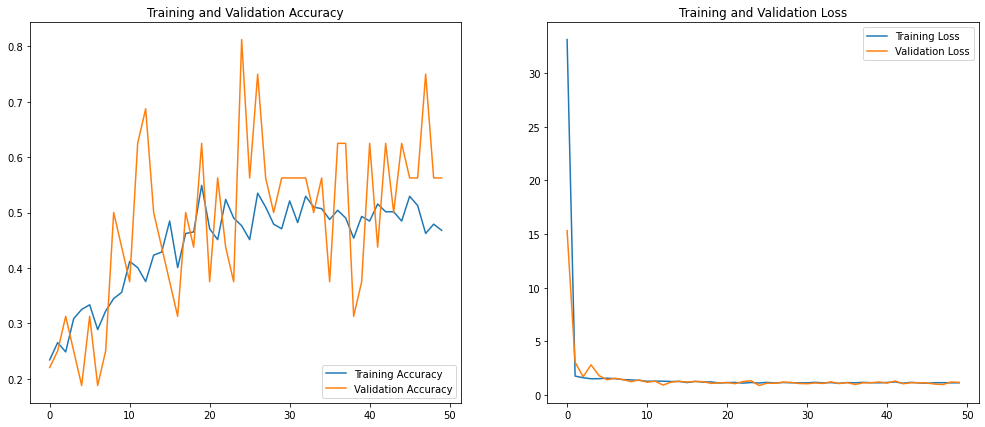

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(num_epochs)

plt.figure(figsize=(17, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model 2

In [37]:
Number_of_filters = [8,16,32,64]

input_shape=(30, 120, 120, 3)

number_of_dense = [1000, 500, 5]

In [38]:
# Define model
model_final = Sequential()

model_final.add(Conv3D(Number_of_filters[0], 
                 kernel_size=(3,3,3), 
                 input_shape=input_shape,
                 padding='same'))
model_final.add(BatchNormalization())
model_final.add(Activation('relu'))

model_final.add(MaxPooling3D(pool_size=(2,2,2)))

model_final.add(Conv3D(Number_of_filters[1], 
                 kernel_size=(3,3,3), 
                 padding='same'))
model_final.add(BatchNormalization())
model_final.add(Activation('relu'))

model_final.add(MaxPooling3D(pool_size=(2,2,2)))

model_final.add(Conv3D(Number_of_filters[2], 
                 kernel_size=(1,3,3), 
                 padding='same'))
model_final.add(BatchNormalization())
model_final.add(Activation('relu'))

model_final.add(MaxPooling3D(pool_size=(2,2,2)))

model_final.add(Conv3D(Number_of_filters[3], 
                 kernel_size=(1,3,3), 
                 padding='same'))
model_final.add(Activation('relu'))
model_final.add(Dropout(0.25))

model_final.add(MaxPooling3D(pool_size=(2,2,2)))

#Flatten Layers
model_final.add(Flatten())

model_final.add(Dense(number_of_dense[0], activation='relu'))
model_final.add(Dropout(0.5))

model_final.add(Dense(number_of_dense[1], activation='relu'))
model_final.add(Dropout(0.5))

#softmax layer
model_final.add(Dense(number_of_dense[2], activation='softmax'))

In [39]:
optimiser = tf.keras.optimizers.Adam(lr=0.01) # optimizers.Adam(lr=0.001) 
model_final.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_final.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_4 (Conv3D)           (None, 30, 120, 120, 8)   656       
                                                                 
 batch_normalization_4 (Batc  (None, 30, 120, 120, 8)  32        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 30, 120, 120, 8)   0         
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 15, 60, 60, 8)    0         
 3D)                                                             
                                                                 
 conv3d_5 (Conv3D)           (None, 15, 60, 60, 16)    3472      
                                                                 
 batch_normalization_5 (Batc  (None, 15, 60, 60, 16)  

In [40]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [ ]:
# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar()

history = model_final.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=0,
          callbacks=[tqdm_callback, callbacks_list], validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Training:   0%|           0/50 ETA: ?s,  ?epochs/s

Epoch 1/50


0/21           ETA: ?s - 

Batch:  21 Index: 32
Source path =  /content/Demo_Gesture/Project_data/val ; batch size = 32
Batch:  4 Index: 32

Epoch 1: saving model to model_init_2022-02-2716_40_09.555282/model-00001-7.93340-0.19225-1.60426-0.22000.h5
Epoch 2/50


0/21           ETA: ?s - 


Epoch 2: saving model to model_init_2022-02-2716_40_09.555282/model-00002-1.61559-0.21532-1.60470-0.25000.h5
Epoch 3/50


0/21           ETA: ?s - 

Batch:  29 Index: 23

Epoch 3: saving model to model_init_2022-02-2716_40_09.555282/model-00003-1.61917-0.21957-1.63923-0.06250.h5

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 4/50


0/21           ETA: ?s - 

Batch:  35 Index: 19

Epoch 4: saving model to model_init_2022-02-2716_40_09.555282/model-00004-1.61357-0.18987-1.60750-0.18750.h5
Epoch 5/50


0/21           ETA: ?s - 


Epoch 5: saving model to model_init_2022-02-2716_40_09.555282/model-00005-1.61255-0.20448-1.60732-0.25000.h5

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
Epoch 6/50


0/21           ETA: ?s - 


Epoch 6: saving model to model_init_2022-02-2716_40_09.555282/model-00006-1.60462-0.20448-1.60510-0.12500.h5
Epoch 7/50


0/21           ETA: ?s - 


Epoch 7: saving model to model_init_2022-02-2716_40_09.555282/model-00007-1.61304-0.17367-1.60859-0.06250.h5

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
Epoch 8/50


0/21           ETA: ?s - 


Epoch 8: saving model to model_init_2022-02-2716_40_09.555282/model-00008-1.60947-0.22129-1.59629-0.31250.h5
Epoch 9/50


0/21           ETA: ?s - 


Epoch 9: saving model to model_init_2022-02-2716_40_09.555282/model-00009-1.61000-0.21849-1.61884-0.06250.h5
Epoch 10/50


0/21           ETA: ?s - 


Epoch 10: saving model to model_init_2022-02-2716_40_09.555282/model-00010-1.60455-0.21849-1.61180-0.18750.h5

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.
Epoch 11/50


0/21           ETA: ?s - 


Epoch 11: saving model to model_init_2022-02-2716_40_09.555282/model-00011-1.60747-0.19328-1.60059-0.25000.h5
Epoch 12/50


0/21           ETA: ?s - 


Epoch 12: saving model to model_init_2022-02-2716_40_09.555282/model-00012-1.60868-0.20728-1.60825-0.12500.h5

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0003124999930150807.
Epoch 13/50


0/21           ETA: ?s - 


Epoch 13: saving model to model_init_2022-02-2716_40_09.555282/model-00013-1.60995-0.19888-1.59354-0.18750.h5
Epoch 14/50


0/21           ETA: ?s - 


Epoch 14: saving model to model_init_2022-02-2716_40_09.555282/model-00014-1.61915-0.16246-1.62546-0.18750.h5
Epoch 15/50


0/21           ETA: ?s - 


Epoch 15: saving model to model_init_2022-02-2716_40_09.555282/model-00015-1.60819-0.18768-1.59542-0.31250.h5

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.00015624999650754035.
Epoch 16/50


0/21           ETA: ?s - 


Epoch 16: saving model to model_init_2022-02-2716_40_09.555282/model-00016-1.60596-0.18207-1.61562-0.12500.h5
Epoch 17/50


0/21           ETA: ?s - 


Epoch 17: saving model to model_init_2022-02-2716_40_09.555282/model-00017-1.61079-0.19888-1.60562-0.06250.h5

Epoch 17: ReduceLROnPlateau reducing learning rate to 7.812499825377017e-05.
Epoch 18/50


0/21           ETA: ?s - 


Epoch 18: saving model to model_init_2022-02-2716_40_09.555282/model-00018-1.60919-0.19888-1.60669-0.18750.h5
Epoch 19/50


0/21           ETA: ?s - 


Epoch 19: saving model to model_init_2022-02-2716_40_09.555282/model-00019-1.61352-0.17087-1.60709-0.12500.h5

Epoch 19: ReduceLROnPlateau reducing learning rate to 3.9062499126885086e-05.
Epoch 20/50


0/21           ETA: ?s - 


Epoch 20: saving model to model_init_2022-02-2716_40_09.555282/model-00020-1.61093-0.19048-1.60563-0.37500.h5
Epoch 21/50


0/21           ETA: ?s - 


Epoch 21: saving model to model_init_2022-02-2716_40_09.555282/model-00021-1.60071-0.26891-1.62044-0.25000.h5

Epoch 21: ReduceLROnPlateau reducing learning rate to 1.9531249563442543e-05.
Epoch 22/50


0/21           ETA: ?s - 


Epoch 22: saving model to model_init_2022-02-2716_40_09.555282/model-00022-1.60885-0.22129-1.61350-0.12500.h5
Epoch 23/50


0/21           ETA: ?s - 

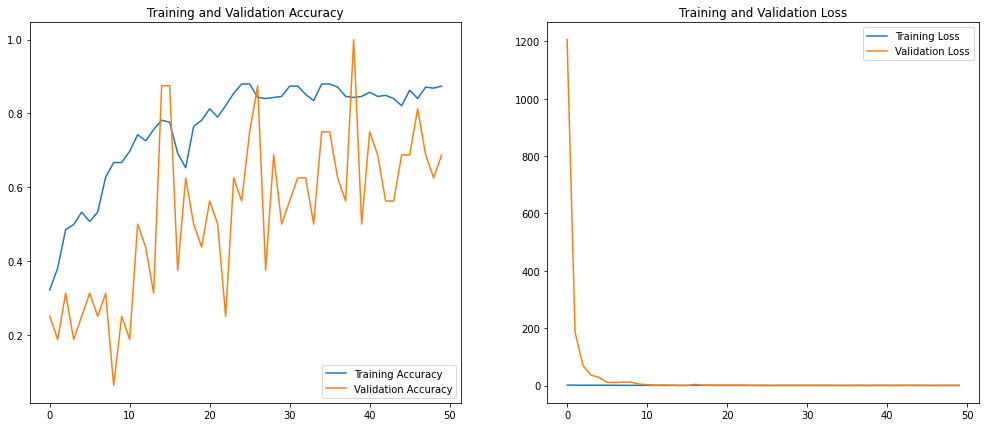

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(num_epochs)

plt.figure(figsize=(17, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model 3

In [42]:
dense_neurons=64
dropout=0.25
num_classes=5

In [43]:
model = Sequential()
model.add(Conv3D(8, (3, 3, 3), input_shape=input_shape,padding='same'))


model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

model.add(Conv3D(16, (3, 3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

model.add(Conv3D(32, (2, 2, 2), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

model.add(Conv3D(64, (2, 2, 2), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

model.add(Flatten())
model.add(Dense(dense_neurons,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))

model.add(Dense(dense_neurons,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))

model.add(Dense(num_classes,activation='softmax'))

In [44]:
optimiser = tf.keras.optimizers.Adam(lr=0.02) # optimizers.Adam(lr=0.001) 
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_8 (Conv3D)           (None, 30, 120, 120, 8)   656       
                                                                 
 activation_8 (Activation)   (None, 30, 120, 120, 8)   0         
                                                                 
 batch_normalization_7 (Batc  (None, 30, 120, 120, 8)  32        
 hNormalization)                                                 
                                                                 
 max_pooling3d_8 (MaxPooling  (None, 15, 60, 60, 8)    0         
 3D)                                                             
                                                                 
 conv3d_9 (Conv3D)           (None, 15, 60, 60, 16)    3472      
                                                                 
 activation_9 (Activation)   (None, 15, 60, 60, 16)   

In [ ]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [ ]:
# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar()

history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=0,
          callbacks=[tqdm_callback, callbacks_list], validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /content/Demo_Gesture/Project_data/train ; batch size = 32


Training:   0%|           0/50 ETA: ?s,  ?epochs/s

Epoch 1/50


0/21           ETA: ?s - 

Batch:  21 Index: 32
Source path =  /content/Demo_Gesture/Project_data/val ; batch size = 32
Batch:  4 Index: 32

Epoch 1: saving model to model_init_2022-02-2707_25_48.627219/model-00001-1.74592-0.32127-1206.23059-0.25000.h5
Epoch 2/50


0/21           ETA: ?s - 


Epoch 2: saving model to model_init_2022-02-2707_25_48.627219/model-00002-1.42644-0.38095-185.56461-0.18750.h5
Epoch 3/50


0/21           ETA: ?s - 

Batch:  29 Index: 23

Epoch 3: saving model to model_init_2022-02-2707_25_48.627219/model-00003-1.20558-0.48478-68.99416-0.31250.h5
Epoch 4/50


0/21           ETA: ?s - 

Batch:  35 Index: 19

Epoch 4: saving model to model_init_2022-02-2707_25_48.627219/model-00004-1.18389-0.49875-36.40986-0.18750.h5
Epoch 5/50


0/21           ETA: ?s - 


Epoch 5: saving model to model_init_2022-02-2707_25_48.627219/model-00005-1.13752-0.53221-28.43934-0.25000.h5
Epoch 6/50


0/21           ETA: ?s - 


Epoch 6: saving model to model_init_2022-02-2707_25_48.627219/model-00006-1.18421-0.50700-10.82655-0.31250.h5
Epoch 7/50


0/21           ETA: ?s - 


Epoch 7: saving model to model_init_2022-02-2707_25_48.627219/model-00007-1.04718-0.53221-10.44597-0.25000.h5
Epoch 8/50


0/21           ETA: ?s - 


Epoch 8: saving model to model_init_2022-02-2707_25_48.627219/model-00008-0.89232-0.62745-12.18044-0.31250.h5
Epoch 9/50


0/21           ETA: ?s - 


Epoch 9: saving model to model_init_2022-02-2707_25_48.627219/model-00009-0.85640-0.66667-11.56734-0.06250.h5

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.009999999776482582.
Epoch 10/50


0/21           ETA: ?s - 


Epoch 10: saving model to model_init_2022-02-2707_25_48.627219/model-00010-0.84865-0.66667-5.42060-0.25000.h5
Epoch 11/50


0/21           ETA: ?s - 


Epoch 11: saving model to model_init_2022-02-2707_25_48.627219/model-00011-0.75712-0.69748-3.13720-0.18750.h5
Epoch 12/50


0/21           ETA: ?s - 


Epoch 12: saving model to model_init_2022-02-2707_25_48.627219/model-00012-0.67774-0.74230-1.62458-0.50000.h5
Epoch 13/50


0/21           ETA: ?s - 


Epoch 13: saving model to model_init_2022-02-2707_25_48.627219/model-00013-0.67576-0.72549-2.01001-0.43750.h5
Epoch 14/50


0/21           ETA: ?s - 


Epoch 14: saving model to model_init_2022-02-2707_25_48.627219/model-00014-0.62204-0.75630-1.59680-0.31250.h5
Epoch 15/50


0/21           ETA: ?s - 


Epoch 15: saving model to model_init_2022-02-2707_25_48.627219/model-00015-0.59584-0.78151-0.31519-0.87500.h5
Epoch 16/50


0/21           ETA: ?s - 


Epoch 16: saving model to model_init_2022-02-2707_25_48.627219/model-00016-0.64482-0.77591-0.57889-0.87500.h5
Epoch 17/50


0/21           ETA: ?s - 


Epoch 17: saving model to model_init_2022-02-2707_25_48.627219/model-00017-0.82855-0.69188-4.21538-0.37500.h5

Epoch 17: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 18/50


0/21           ETA: ?s - 


Epoch 18: saving model to model_init_2022-02-2707_25_48.627219/model-00018-0.93621-0.65266-1.07701-0.62500.h5
Epoch 19/50


0/21           ETA: ?s - 


Epoch 19: saving model to model_init_2022-02-2707_25_48.627219/model-00019-0.64730-0.76471-1.48311-0.50000.h5

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
Epoch 20/50


0/21           ETA: ?s - 


Epoch 20: saving model to model_init_2022-02-2707_25_48.627219/model-00020-0.54126-0.78151-1.45201-0.43750.h5
Epoch 21/50


0/21           ETA: ?s - 


Epoch 21: saving model to model_init_2022-02-2707_25_48.627219/model-00021-0.50505-0.81232-1.26777-0.56250.h5

Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
Epoch 22/50


0/21           ETA: ?s - 


Epoch 22: saving model to model_init_2022-02-2707_25_48.627219/model-00022-0.49808-0.78992-1.49778-0.50000.h5
Epoch 23/50


0/21           ETA: ?s - 


Epoch 23: saving model to model_init_2022-02-2707_25_48.627219/model-00023-0.48141-0.82073-1.46844-0.25000.h5

Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.
Epoch 24/50


0/21           ETA: ?s - 


Epoch 24: saving model to model_init_2022-02-2707_25_48.627219/model-00024-0.40077-0.85434-0.85333-0.62500.h5
Epoch 25/50


0/21           ETA: ?s - 


Epoch 25: saving model to model_init_2022-02-2707_25_48.627219/model-00025-0.37106-0.87955-1.10687-0.56250.h5

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0003124999930150807.
Epoch 26/50


0/21           ETA: ?s - 


Epoch 26: saving model to model_init_2022-02-2707_25_48.627219/model-00026-0.39243-0.87955-0.45589-0.75000.h5
Epoch 27/50


0/21           ETA: ?s - 


Epoch 27: saving model to model_init_2022-02-2707_25_48.627219/model-00027-0.39274-0.84314-0.47093-0.87500.h5

Epoch 27: ReduceLROnPlateau reducing learning rate to 0.00015624999650754035.
Epoch 28/50


0/21           ETA: ?s - 


Epoch 28: saving model to model_init_2022-02-2707_25_48.627219/model-00028-0.41164-0.84034-1.22793-0.37500.h5
Epoch 29/50


0/21           ETA: ?s - 


Epoch 29: saving model to model_init_2022-02-2707_25_48.627219/model-00029-0.46918-0.84314-0.58088-0.68750.h5

Epoch 29: ReduceLROnPlateau reducing learning rate to 7.812499825377017e-05.
Epoch 30/50


0/21           ETA: ?s - 


Epoch 30: saving model to model_init_2022-02-2707_25_48.627219/model-00030-0.43424-0.84594-0.99487-0.50000.h5
Epoch 31/50


0/21           ETA: ?s - 


Epoch 31: saving model to model_init_2022-02-2707_25_48.627219/model-00031-0.38304-0.87395-0.91051-0.56250.h5

Epoch 31: ReduceLROnPlateau reducing learning rate to 3.9062499126885086e-05.
Epoch 32/50


0/21           ETA: ?s - 


Epoch 32: saving model to model_init_2022-02-2707_25_48.627219/model-00032-0.37173-0.87395-0.84221-0.62500.h5
Epoch 33/50


0/21           ETA: ?s - 


Epoch 33: saving model to model_init_2022-02-2707_25_48.627219/model-00033-0.42753-0.85154-0.87951-0.62500.h5

Epoch 33: ReduceLROnPlateau reducing learning rate to 1.9531249563442543e-05.
Epoch 34/50


0/21           ETA: ?s - 


Epoch 34: saving model to model_init_2022-02-2707_25_48.627219/model-00034-0.44246-0.83473-0.76284-0.50000.h5
Epoch 35/50


0/21           ETA: ?s - 


Epoch 35: saving model to model_init_2022-02-2707_25_48.627219/model-00035-0.35544-0.87955-0.54589-0.75000.h5

Epoch 35: ReduceLROnPlateau reducing learning rate to 9.765624781721272e-06.
Epoch 36/50


0/21           ETA: ?s - 


Epoch 36: saving model to model_init_2022-02-2707_25_48.627219/model-00036-0.37137-0.87955-0.55452-0.75000.h5
Epoch 37/50


0/21           ETA: ?s - 


Epoch 37: saving model to model_init_2022-02-2707_25_48.627219/model-00037-0.39268-0.87115-0.79623-0.62500.h5

Epoch 37: ReduceLROnPlateau reducing learning rate to 4.882812390860636e-06.
Epoch 38/50


0/21           ETA: ?s - 


Epoch 38: saving model to model_init_2022-02-2707_25_48.627219/model-00038-0.40261-0.84594-0.73491-0.56250.h5
Epoch 39/50


0/21           ETA: ?s - 


Epoch 39: saving model to model_init_2022-02-2707_25_48.627219/model-00039-0.42432-0.84314-0.26551-1.00000.h5
Epoch 40/50


0/21           ETA: ?s - 


Epoch 40: saving model to model_init_2022-02-2707_25_48.627219/model-00040-0.39829-0.84594-1.06525-0.50000.h5
Epoch 41/50


0/21           ETA: ?s - 


Epoch 41: saving model to model_init_2022-02-2707_25_48.627219/model-00041-0.39755-0.85714-0.56516-0.75000.h5

Epoch 41: ReduceLROnPlateau reducing learning rate to 2.441406195430318e-06.
Epoch 42/50


0/21           ETA: ?s - 


Epoch 42: saving model to model_init_2022-02-2707_25_48.627219/model-00042-0.44943-0.84594-0.62227-0.68750.h5
Epoch 43/50


0/21           ETA: ?s - 


Epoch 43: saving model to model_init_2022-02-2707_25_48.627219/model-00043-0.41738-0.84874-0.96487-0.56250.h5

Epoch 43: ReduceLROnPlateau reducing learning rate to 1.220703097715159e-06.
Epoch 44/50


0/21           ETA: ?s - 


Epoch 44: saving model to model_init_2022-02-2707_25_48.627219/model-00044-0.42550-0.84034-0.96000-0.56250.h5
Epoch 45/50


0/21           ETA: ?s - 


Epoch 45: saving model to model_init_2022-02-2707_25_48.627219/model-00045-0.47701-0.82073-0.62304-0.68750.h5

Epoch 45: ReduceLROnPlateau reducing learning rate to 6.103515488575795e-07.
Epoch 46/50


0/21           ETA: ?s - 


Epoch 46: saving model to model_init_2022-02-2707_25_48.627219/model-00046-0.38793-0.86275-0.66988-0.68750.h5
Epoch 47/50


0/21           ETA: ?s - 


Epoch 47: saving model to model_init_2022-02-2707_25_48.627219/model-00047-0.42253-0.84034-0.39400-0.81250.h5

Epoch 47: ReduceLROnPlateau reducing learning rate to 3.0517577442878974e-07.
Epoch 48/50


0/21           ETA: ?s - 


Epoch 48: saving model to model_init_2022-02-2707_25_48.627219/model-00048-0.37437-0.87115-0.66030-0.68750.h5
Epoch 49/50


0/21           ETA: ?s - 


Epoch 49: saving model to model_init_2022-02-2707_25_48.627219/model-00049-0.37594-0.86835-0.68610-0.62500.h5

Epoch 49: ReduceLROnPlateau reducing learning rate to 1.5258788721439487e-07.
Epoch 50/50


0/21           ETA: ?s - 


Epoch 50: saving model to model_init_2022-02-2707_25_48.627219/model-00050-0.35660-0.87395-0.65725-0.68750.h5


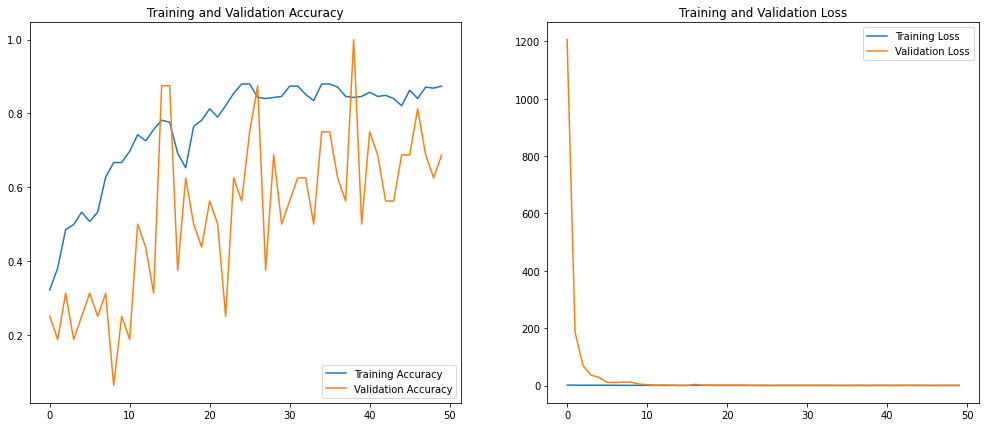

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(num_epochs)

plt.figure(figsize=(17, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()